In [13]:
import os
import pickle
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier   
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("K:/Computer Science/Brand_Reputation_Management_System/sentiment_analysis/data_preprocessing/processed_dataset.csv")
df = df.dropna(subset=['cleaned_review', 'sentiment'])

X = df['cleaned_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
tfidf = TfidfVectorizer(max_features=5000, min_df=5)
bow_vectorizer = CountVectorizer(max_features=5000, min_df=5)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

scaler = StandardScaler(with_mean=False)
X_train_tfidf = scaler.fit_transform(X_train_tfidf)
X_test_tfidf = scaler.transform(X_test_tfidf)

In [16]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [17]:
models = {
    'XGBClassifier': XGBClassifier(learning_rate=0.2, max_depth=6, n_estimators=200, eval_metric='mlogloss'),
    'Logistic Regression': LogisticRegression(C=0.01, solver='liblinear'),
    'Naive Bayes': MultinomialNB(alpha=10.0),
    'Random Forest': RandomForestClassifier(max_depth=None, min_samples_split=5, n_estimators=200, n_jobs=-1)
}


Evaluating XGBClassifier:
XGBClassifier Cross-Validation Accuracy (TF-IDF): 0.8703 (+/- 0.0005)
XGBClassifier Classification Report (TF-IDF):
              precision    recall  f1-score   support

           0       0.74      0.62      0.68      9800
           1       0.45      0.07      0.13      5690
           2       0.89      0.98      0.94     61376

    accuracy                           0.87     76866
   macro avg       0.70      0.56      0.58     76866
weighted avg       0.84      0.87      0.84     76866



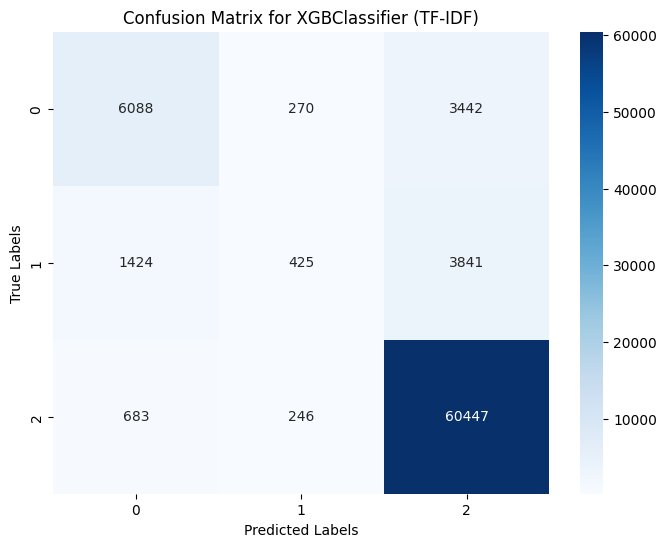

XGBClassifier Classification Report (BOW):
              precision    recall  f1-score   support

           0       0.74      0.61      0.67      9800
           1       0.45      0.09      0.15      5690
           2       0.89      0.98      0.94     61376

    accuracy                           0.87     76866
   macro avg       0.69      0.56      0.58     76866
weighted avg       0.84      0.87      0.84     76866



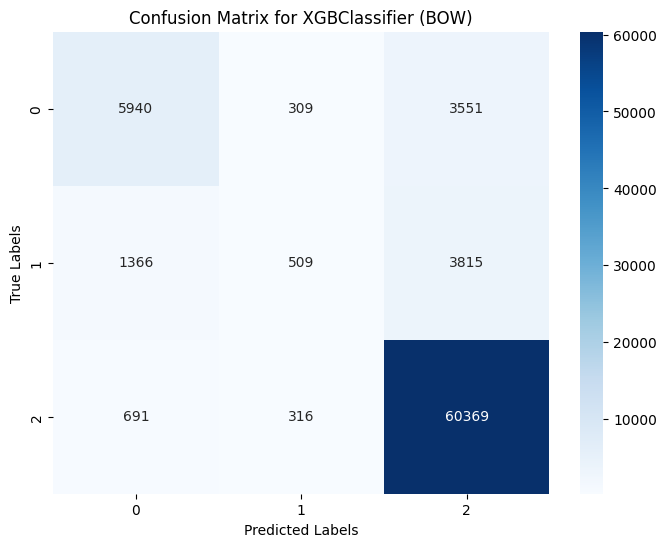


Evaluating Logistic Regression:
Logistic Regression Cross-Validation Accuracy (TF-IDF): 0.8787 (+/- 0.0007)
Logistic Regression Classification Report (TF-IDF):
              precision    recall  f1-score   support

           0       0.70      0.73      0.72      9800
           1       0.41      0.13      0.20      5690
           2       0.92      0.97      0.95     61376

    accuracy                           0.88     76866
   macro avg       0.68      0.61      0.62     76866
weighted avg       0.85      0.88      0.86     76866



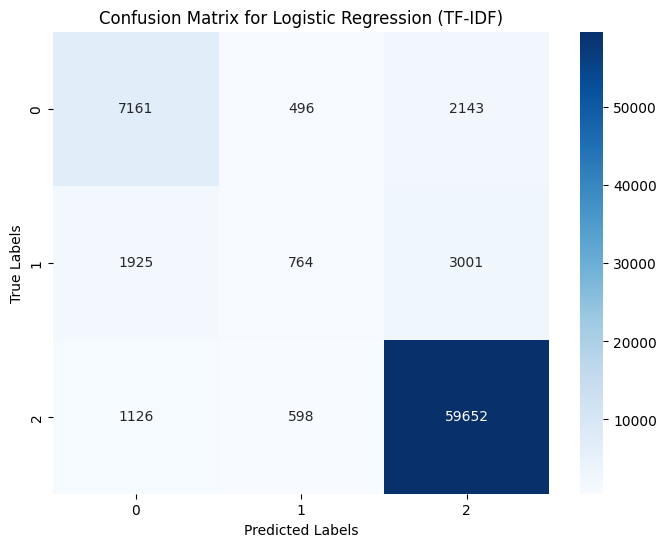

Logistic Regression Classification Report (BOW):
              precision    recall  f1-score   support

           0       0.73      0.60      0.66      9800
           1       0.45      0.06      0.11      5690
           2       0.89      0.98      0.93     61376

    accuracy                           0.87     76866
   macro avg       0.69      0.55      0.57     76866
weighted avg       0.84      0.87      0.84     76866



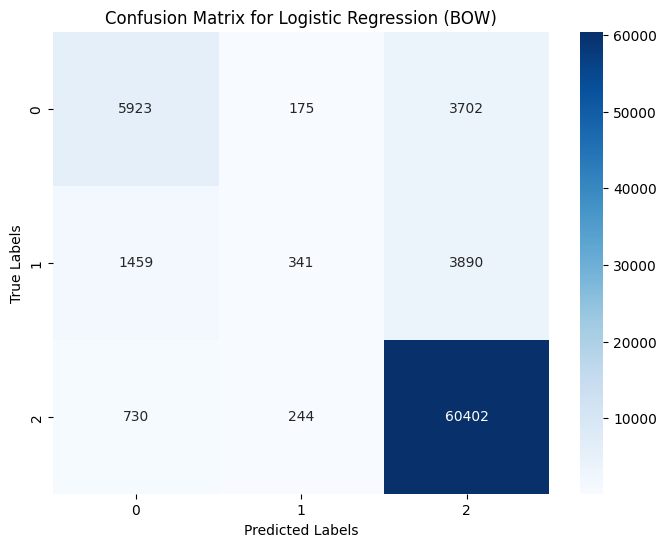


Evaluating Naive Bayes:
Naive Bayes Cross-Validation Accuracy (TF-IDF): 0.7607 (+/- 0.0013)
Naive Bayes Classification Report (TF-IDF):
              precision    recall  f1-score   support

           0       0.53      0.61      0.57      9800
           1       0.22      0.54      0.32      5690
           2       0.96      0.81      0.88     61376

    accuracy                           0.77     76866
   macro avg       0.57      0.65      0.59     76866
weighted avg       0.85      0.77      0.80     76866



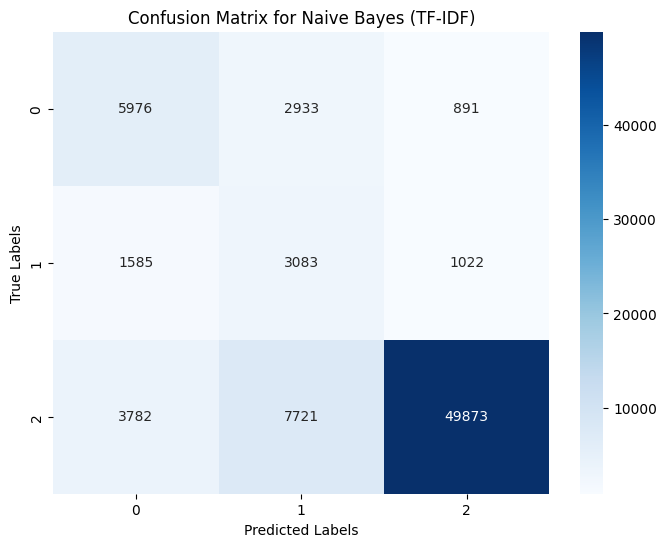

Naive Bayes Classification Report (BOW):
              precision    recall  f1-score   support

           0       0.64      0.61      0.62      9800
           1       0.29      0.36      0.32      5690
           2       0.94      0.92      0.93     61376

    accuracy                           0.84     76866
   macro avg       0.62      0.63      0.62     76866
weighted avg       0.85      0.84      0.84     76866



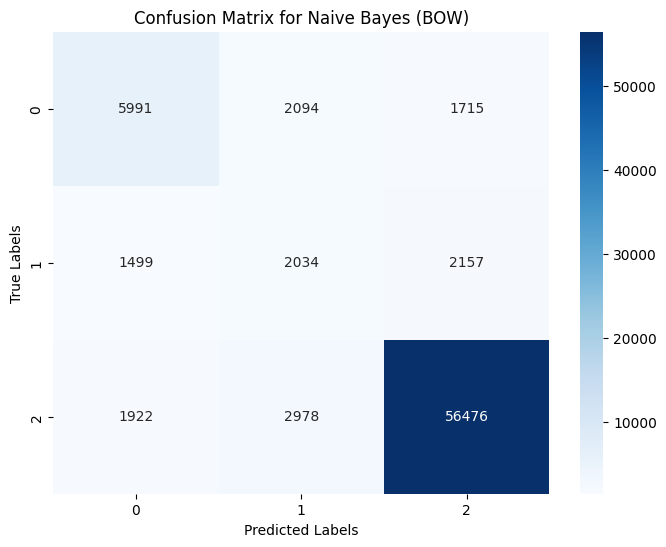


Evaluating Random Forest:
Random Forest Cross-Validation Accuracy (TF-IDF): 0.8683 (+/- 0.0008)
Random Forest Classification Report (TF-IDF):
              precision    recall  f1-score   support

           0       0.73      0.63      0.68      9800
           1       0.40      0.01      0.03      5690
           2       0.89      0.99      0.93     61376

    accuracy                           0.87     76866
   macro avg       0.67      0.54      0.55     76866
weighted avg       0.83      0.87      0.83     76866



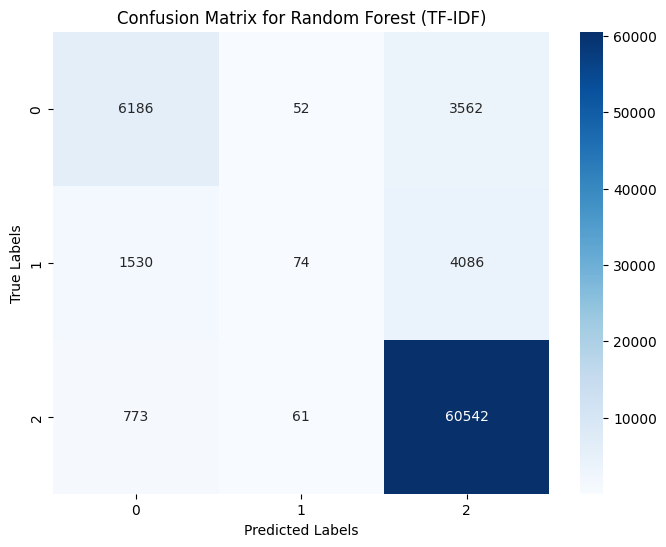

Random Forest Classification Report (BOW):
              precision    recall  f1-score   support

           0       0.73      0.65      0.69      9800
           1       0.35      0.01      0.02      5690
           2       0.89      0.99      0.94     61376

    accuracy                           0.87     76866
   macro avg       0.66      0.55      0.55     76866
weighted avg       0.83      0.87      0.84     76866



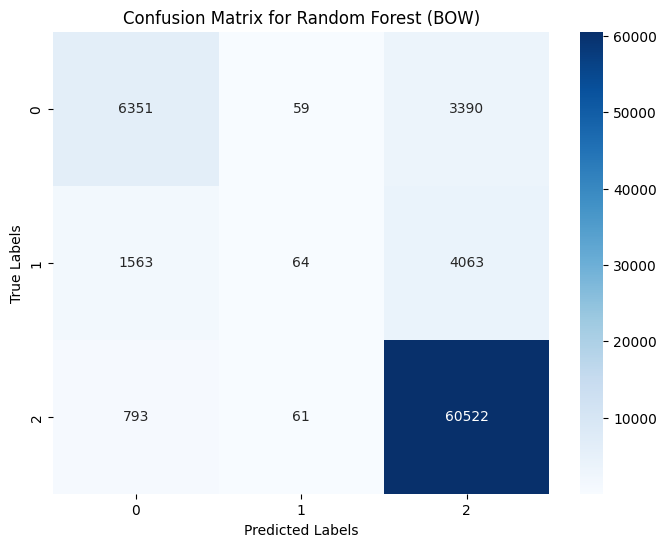

In [18]:
# Best parameters for XGBClassifier: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 200}
# Best parameters for Logistic Regression: {'C': 0.01, 'solver': 'liblinear'}
# Best parameters for Naive Bayes: {'alpha': 10.0}
# Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
results = {}
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}:")

    # Cross-validation on TF-IDF features
    cv_scores = cross_val_score(model, X_train_tfidf, y_train_encoded, cv=5, scoring='accuracy')
    print(f"{model_name} Cross-Validation Accuracy (TF-IDF): {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})")

    # Train and evaluate on TF-IDF features
    model.fit(X_train_tfidf, y_train_encoded)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test_encoded, y_pred)
    results[f"{model_name} (TF-IDF)"] = accuracy
    print(f"{model_name} Classification Report (TF-IDF):")
    print(classification_report(y_test_encoded, y_pred))

    # Confusion matrix for TF-IDF features
    cm_tfidf = confusion_matrix(y_test_encoded, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_encoded), yticklabels=np.unique(y_test_encoded))
    plt.title(f"Confusion Matrix for {model_name} (TF-IDF)")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Train and evaluate on BOW features
    model.fit(X_train_bow, y_train_encoded)
    y_pred = model.predict(X_test_bow)
    accuracy = accuracy_score(y_test_encoded, y_pred)
    results[f"{model_name} (BOW)"] = accuracy
    print(f"{model_name} Classification Report (BOW):")
    print(classification_report(y_test_encoded, y_pred))

    # Confusion matrix for BOW features
    cm_bow = confusion_matrix(y_test_encoded, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_bow, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_encoded), yticklabels=np.unique(y_test_encoded))
    plt.title(f"Confusion Matrix for {model_name} (BOW)")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


Overall Model Performance:
                          Model  Accuracy
2  Logistic Regression (TF-IDF)  0.879153
0        XGBClassifier (TF-IDF)  0.871126
7           Random Forest (BOW)  0.870827
1           XGBClassifier (BOW)  0.869279
6        Random Forest (TF-IDF)  0.869071
3     Logistic Regression (BOW)  0.867302
5             Naive Bayes (BOW)  0.839136
4          Naive Bayes (TF-IDF)  0.766685


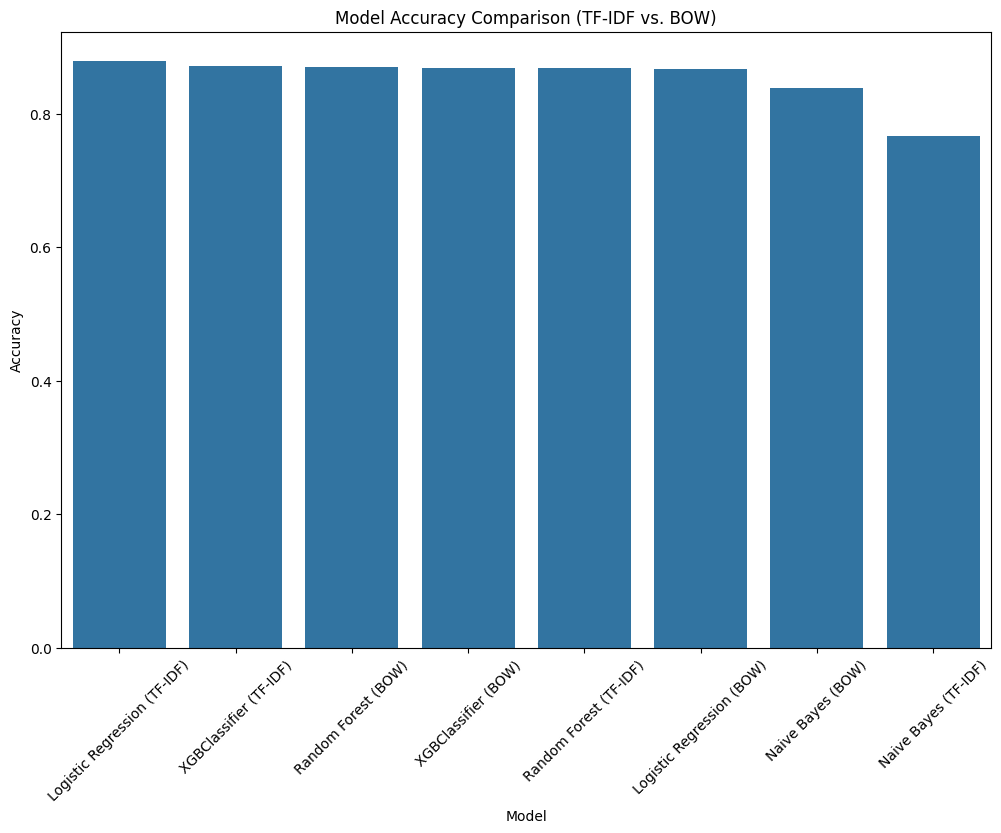

In [19]:
results_df = pd.DataFrame([{"Model": name, "Accuracy": acc} for name, acc in results.items()])
results_df.sort_values(by="Accuracy", ascending=False, inplace=True)

print("\nOverall Model Performance:")
print(results_df)
plt.figure(figsize=(12, 8))
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.title("Model Accuracy Comparison (TF-IDF vs. BOW)")
plt.xticks(rotation=45)
plt.show()

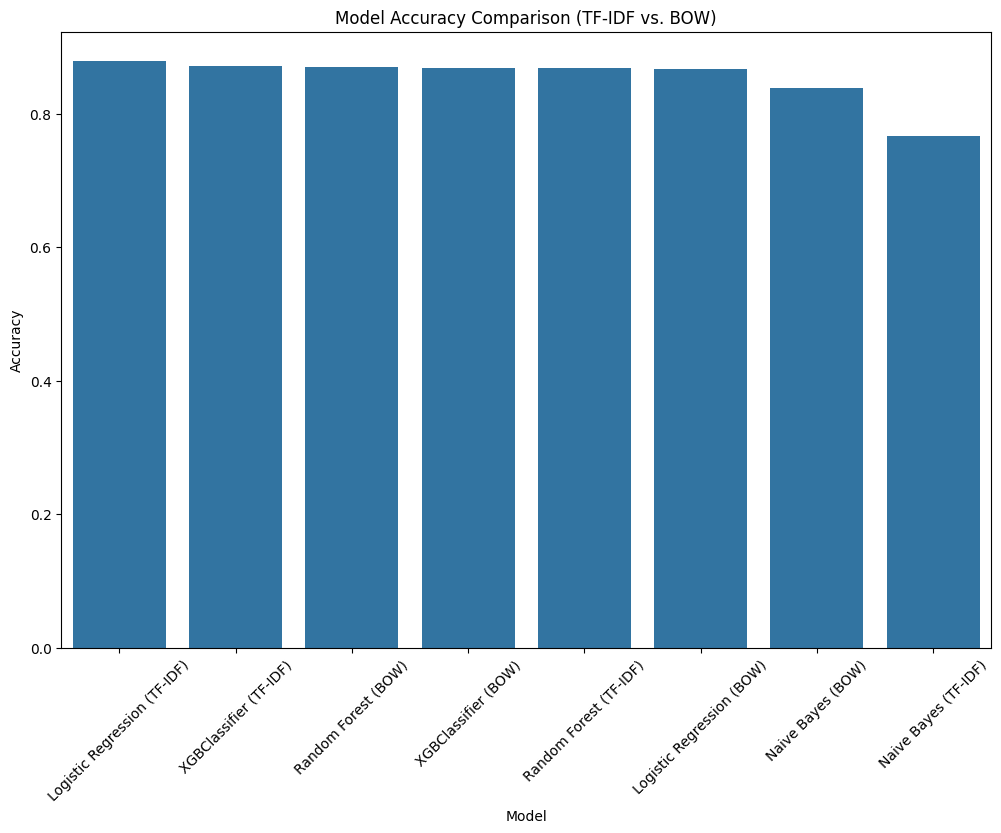

In [20]:
plt.figure(figsize=(12, 8))
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.title("Model Accuracy Comparison (TF-IDF vs. BOW)")
plt.xticks(rotation=45)
plt.show()

In [21]:
model_save_path = "K:/Computer Science/Brand_Reputation_Management_System/sentiment_analysis/saved_models/"
os.makedirs(model_save_path, exist_ok=True)

for model_name, model in models.items():
    model_filename = os.path.join(model_save_path, f"{model_name}.pkl")
    with open(model_filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"{model_name} saved to {model_filename}")

XGBClassifier saved to K:/Computer Science/Brand_Reputation_Management_System/sentiment_analysis/saved_models/XGBClassifier.pkl
Logistic Regression saved to K:/Computer Science/Brand_Reputation_Management_System/sentiment_analysis/saved_models/Logistic Regression.pkl
Naive Bayes saved to K:/Computer Science/Brand_Reputation_Management_System/sentiment_analysis/saved_models/Naive Bayes.pkl
Random Forest saved to K:/Computer Science/Brand_Reputation_Management_System/sentiment_analysis/saved_models/Random Forest.pkl
